# Assignment 02 Probability Models - An Intro of Language Models


## 2. Review questions

+ ***1. How to use Github and why use Jupyter and Pycharm***
   + --
   + --

      

+ ***2. What's a probability model?***
   + A probability model "assigns a probability to each possible next word" (Jurafsky & Martin, 2018: Chapter 3) and thus can be used to predict the probability of an sentence or a sequence of words appearing in a text corpus.

+ ***3. Some scenarios where we use probability models?***
   + speech recognition (e.g., spelling correction, machine translation);
   + augmentive communication (e.g., word prediction can be used to suggest likely words; 搜狗智能输入法)

+ ***4. Why do we use probability models and what are the difficulties for programming based on parsing and pattern match?***
   + --
   + --

+ ***5. What's a language model?***
   + Models that "assign probabilities to sequences of words" (Jurafsky & Martin, 2018: Chapter 3)
   + An n-gram language model predicts the probability of a sentence given the probability of a word sequence consists of *N* words.

+ ***6. Some scenarios where we use language models?***
   + --
   + --

+ ***7. What's a 1-gram language model?***
   + --
   + --

+ ***8. Advantages & disadvantages of the 1-gram model?***
   + --
   + --

+ ***9. What's a 2-gram model?***
   + --
   + --
   
+ ***10. What's a web crawler, and how do you implement a simple crawler?***
   + --
   + --

+ ***11. What are the potential issues with the simple crawler? How can we solve these?***
   + --
   + --
   
+ ***12. What's regular expression? How do we use it?***
   + --
   + --

## 3. Building language models with the Wikipedia corpus


### 3. 1. Import all extracted wiki dump files and get all tokens

In [ ]:
# try importing a smaller wiki dump file first
#  --- comment these codes out since we don't need to download again...

# download the file using wget
#import wget
#url = 'https://dumps.wikimedia.org/zhwiki/20190401/zhwiki-20190401-pages-articles-multistream1.xml-p1p162886.bz2'
#wget.download(url)

In [3]:
# import the extracted text files (stored in "AA" and "AB" folder)
# and compile all articles into a list
# note --- extraction of 1052240 articles in 1190.0s (884.2 art/s) using WikiExtractor

all_articles = []

import glob
import errno

file_path = '/Users/xinweixu/Dropbox/learn/Comp_Prog/nlp/data/extracted/**/wiki_**' 
# test cases -- two folders

#file_path = '/Users/xinweixu/Dropbox/learn/Comp_Prog/nlp/data/extracted_full/**/wiki_**'
# file path for the full extracted wiki dump file
# note (***unresolved***):
# --- importing the full wiki dump file reports encoding error when reading lines!

files = glob.glob(file_path)

for name in files:
    try:
        text_file = open(name, "r", encoding="utf8")
        lines = text_file.readlines()
        all_articles.append(lines)
    except IOError as exc: # not sure what error this is
        if exc.errno != errno.EISDIR:
            raise
            
# notes:
# 1) source for code: 
# https://stackoverflow.com/questions/41002041/read-multiple-txt-files-in-a-single-folder

# 2) The 'glob' library contains a function, also called 'glob', 
#    that finds files and directories whose names match a pattern. 

# 3) the data structure looks like this:
# each element in the list of all_articles is a list itself,
# and for any all_articles[i], each element in it is a new line of sentence

#4) a note for using WikiExtractor.py:
#>> python WikiExtractor.py -o extracted zhwiki-20190401-pages-articles-multistream.xml.bz2
#>> WikiExtractor.py -o [output directory] wiki-dump-file
# see: http://medialab.di.unipi.it/wiki/Wikipedia_Extractor


In [4]:
all_articles[0]

['<doc id="123647" url="https://zh.wikipedia.org/wiki?curid=123647" title="李虎">\n',
 '李虎\n',
 '\n',
 '李虎（），字文彬，代郡武川县（今内蒙古自治区武川县）人。中国北魏、西魏官员，「西魏八大柱國」之一，官至太尉、左仆射，唐朝开国皇帝李渊的祖父。\n',
 '\n',
 '李虎即唐高祖李淵之祖。後世李唐號稱李虎出身於南北朝大族隴西李氏，稱其祖輩十六國時代長居於西涼，具有西涼王室後裔的血統。李虎在关于西魏、北周的史書没有传記，《北史》、《周書》等正史類列传没有记載。西魏北周时期正史是唐朝編纂，李虎在唐代是追尊皇帝，没有列入臣下所在的列传。如同《三国志》没有晋朝皇帝先祖司馬懿的列传一样。但是，关于唐代的史书《旧唐書》、《新唐書》，也没有像《晋書》把司馬懿作为司馬氏先祖记入本紀。李虎相关史料，在《册府元龟》、《資治通鑑》、《西魏書》等後代史書中。\n',
 '\n',
 '529年，北海王元顥在南梁支援下，攻下洛陽。爾朱兆、賀拔勝击败元颢，李虎这时是贺拔胜的弟弟賀拔岳属下，因为討伐万俟醜奴有功，加官寧朔将軍、屯騎校尉、東雍州刺史、衛将軍（武衛将軍或左右衛将軍）。成为了賀拔岳的心腹。534年賀拔岳被暗殺。李虎作為贺拔岳舊部。官至左厢大都督，贺拔岳遇害後，諸將谋议拥戴宇文泰，李虎不同意而“奔荆州”，投靠贺拔胜，後又歸宇文泰。永熙三年（534年），征讨灵州（宁夏灵武县北）刺史曹泥之亂，又“从文帝破高欢於沙苑，斩级居多”。\n',
 '\n',
 '537年，跟随宇文泰参与和東魏高欢之間进行的沙苑之战，538年回到長安，东魏的俘虏趙青雀作乱据長安，李虎和太尉王盟、僕射周惠达辅佐皇太子元钦屯守渭北。李虎镇压各地叛乱、防衛異族有功，任開府儀同三司、封隴西郡公。548年，李虎任右軍大都督、少師。《册府元龟》、《西魏書》记载他当時任太尉、柱国大将軍。当時，西魏柱国大将軍有八名，称「八柱国」。《周書》记载李虎仅次于宇文泰为第二位，《通典》卷34·职官16·勋官条，记载他次于宇文泰、元欣为第3位，《資治通鑑》记载他次于宇文泰、元欣、李弼为第4位。548年宇文泰主導以《周礼》为基础的官制改革。\n',
 '\n',
 '西魏大统十六年（550年），被封為“八大柱國”之一，為陇西郡公，同期還有宇文泰

In [5]:
# remove the following special characters and 
# combine all the article content into a single string TEXT
# --- elements contain <doc id="" url="" title=""> 
# --- '</doc>\n'
# --- '\n'
# --- strip '\n' at the end of each sentence

TEXT = ''

for articles in all_articles:
    for element in articles:
        if element.startswith('<doc id') or element.startswith('</doc>'): 
            articles.remove(element)
        else:
            TEXT += element

TEXT = TEXT.strip('\n') # strip \n

print(TEXT[:300]) # print the first 300 characters to double check

李虎（），字文彬，代郡武川县（今内蒙古自治区武川县）人。中国北魏、西魏官员，「西魏八大柱國」之一，官至太尉、左仆射，唐朝开国皇帝李渊的祖父。

李虎即唐高祖李淵之祖。後世李唐號稱李虎出身於南北朝大族隴西李氏，稱其祖輩十六國時代長居於西涼，具有西涼王室後裔的血統。李虎在关于西魏、北周的史書没有传記，《北史》、《周書》等正史類列传没有记載。西魏北周时期正史是唐朝編纂，李虎在唐代是追尊皇帝，没有列入臣下所在的列传。如同《三国志》没有晋朝皇帝先祖司馬懿的列传一样。但是，关于唐代的史书《旧唐書》、《新唐書》，也没有像《晋書》把司馬懿作为司馬氏先祖记入本紀。李虎相关史料，在《册府元龟》、《資治通鑑》、《西


In [6]:
# next, before cutting TEXT into tokens, we need to
# --- remove all punctuation marks and special characters
# --- change all characters into simplified chinese ('hanziconv' package)

import re
def find_all_tokens(string):
    "Define a procedure to find all tokens and removing speciall characters"
    return ' '.join(re.findall('[\w|\d]+', string))

TEXT_TOKENS = find_all_tokens(TEXT)
print(TEXT_TOKENS[:300])

李虎 字文彬 代郡武川县 今内蒙古自治区武川县 人 中国北魏 西魏官员 西魏八大柱國 之一 官至太尉 左仆射 唐朝开国皇帝李渊的祖父 李虎即唐高祖李淵之祖 後世李唐號稱李虎出身於南北朝大族隴西李氏 稱其祖輩十六國時代長居於西涼 具有西涼王室後裔的血統 李虎在关于西魏 北周的史書没有传記 北史 周書 等正史類列传没有记載 西魏北周时期正史是唐朝編纂 李虎在唐代是追尊皇帝 没有列入臣下所在的列传 如同 三国志 没有晋朝皇帝先祖司馬懿的列传一样 但是 关于唐代的史书 旧唐書 新唐書 也没有像 晋書 把司馬懿作为司馬氏先祖记入本紀 李虎相关史料 在 册府元龟 資治通鑑 西魏書 等後代史書中 529年 


In [7]:
from hanziconv import HanziConv
TEXT_TOKENS = HanziConv.toSimplified(TEXT_TOKENS)
print(TEXT_TOKENS[:300]) # get the simplified chinese version

李虎 字文彬 代郡武川县 今内蒙古自治区武川县 人 中国北魏 西魏官员 西魏八大柱国 之一 官至太尉 左仆射 唐朝开国皇帝李渊的祖父 李虎即唐高祖李渊之祖 后世李唐号称李虎出身于南北朝大族陇西李氏 称其祖辈十六国时代长居于西凉 具有西凉王室后裔的血统 李虎在关于西魏 北周的史书没有传记 北史 周书 等正史类列传没有记载 西魏北周时期正史是唐朝编纂 李虎在唐代是追尊皇帝 没有列入臣下所在的列传 如同 三国志 没有晋朝皇帝先祖司马懿的列传一样 但是 关于唐代的史书 旧唐书 新唐书 也没有像 晋书 把司马懿作为司马氏先祖记入本纪 李虎相关史料 在 册府元龟 资治通鑑 西魏书 等后代史书中 529年 


In [8]:
# now we are ready to get all tokens!!!

import jieba
def cut(string): return list(jieba.cut(string))

ALL_TOKENS = cut(TEXT_TOKENS)
ALL_TOKENS[:25]

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/1y/1btp7xpj7b1f82lnwvn2916h0000gn/T/jieba.cache
Loading model cost 0.682 seconds.
Prefix dict has been built succesfully.


['李虎',
 ' ',
 '字文彬',
 ' ',
 '代郡',
 '武川县',
 ' ',
 '今',
 '内蒙古自治区',
 '武川县',
 ' ',
 '人',
 ' ',
 '中国',
 '北魏',
 ' ',
 '西魏',
 '官员',
 ' ',
 '西魏',
 '八大',
 '柱国',
 ' ',
 '之一',
 ' ']

In [9]:
# there are still whitespaces need to be removed

valid_tokens = [t for t in ALL_TOKENS if t.strip()]

In [10]:
len(ALL_TOKENS)

34838049

In [11]:
len(valid_tokens)

28893383

In [12]:
valid_tokens[:25]

['李虎',
 '字文彬',
 '代郡',
 '武川县',
 '今',
 '内蒙古自治区',
 '武川县',
 '人',
 '中国',
 '北魏',
 '西魏',
 '官员',
 '西魏',
 '八大',
 '柱国',
 '之一',
 '官至',
 '太尉',
 '左仆射',
 '唐朝',
 '开国',
 '皇帝',
 '李渊',
 '的',
 '祖父']

### 3. 2. Get the frequences of word and implement the 1-gram model

In [14]:
from collections import Counter

In [15]:
words_count = Counter(valid_tokens)

In [16]:
words_count.most_common(10)

[('的', 1645591),
 ('在', 434724),
 ('年', 360544),
 ('是', 307155),
 ('和', 256620),
 ('了', 214045),
 ('为', 196316),
 ('与', 153883),
 ('月', 152525),
 ('有', 144780)]

In [17]:
# plot the frequency distribution

import matplotlib.pyplot as plt
%matplotlib inline

frequences = [f for w, f in words_count.most_common(200)]
x = [i for i in range(len(frequences))]

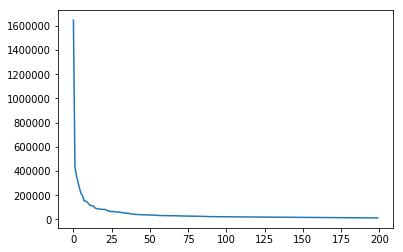

In [18]:
plt.plot(x, frequences)

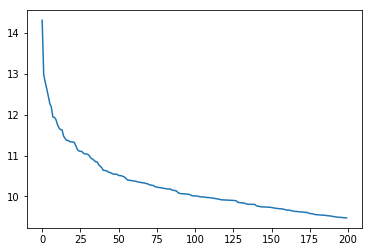

In [19]:
# log-transform the y-axis

import numpy as np
plt.plot(x, np.log(frequences))

In [20]:
# get frequences for all single words (1-grams)

frequences_all = [f for w, f in words_count.most_common()]
frequences_sum = sum(frequences_all)
frequences_sum

28893383

In [21]:
# the expected probability for a 1-gram

1/frequences_sum

3.461000049734571e-08

In [22]:
# now we define a procedure to calculate the probability for a give word
def get_prob(word):
    eps = 1 / frequences_sum # define a small constant, epsilon
    if word in words_count:
        return words_count[word] / frequences_sum
    else:
        return eps 
    
# note:
# if the word is not shown in the text, return epsilon
# to avoid zeros in calculating the probability of a given sentence
# in the prodecure defined below


In [25]:
get_prob("火箭")

4.416236063461312e-05

In [30]:
# define a procedure to calculate the probability of a given sentence
# using the simplified 1-gram model
from functools import reduce

def product(numbers):
    "Return the multiplication product for a list of numbers"
    return reduce(lambda n1, n2: n1 * n2, numbers)

def sentence_prob_one_gram(string):
    "Return Pr(S) for a given sentence using the 1-gram model"
    words = cut(string)
    return product([get_prob(w) for w in words])

# A note for 'reduce': 
# -- apply function of two arguments cumulatively to the items of sequence 
# from left to right, so as to reduce the sequence to a single value. 
# For example, reduce(lambda x, y: x+y, [1, 2, 3, 4, 5]) 
# calculates ((((1+2)+3)+4)+5)

In [33]:
sentence_prob_one_gram("广交会下个月举办")

1.506505140005086e-17

In [34]:
sentence_prob_one_gram("牛顿发现了万有引力定律")

6.844846529772314e-20

In [36]:
# now we want to write a procedure to find the sentence with 
# a higher probability of occurrence within a pair

need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "小明毕业于清华大学 小明毕业于秦华大学"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = sentence_prob_one_gram(s1), sentence_prob_one_gram(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 9.000690505386897e-54
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 7.86447494011467e-52
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 5.343869286250445e-26
---- 真是一只好看的小猫 with probility 3.702574918405419e-23
小明毕业于清华大学 is more possible
---- 小明毕业于清华大学 with probility 4.837839037696127e-18
---- 小明毕业于秦华大学 with probility 3.667820405776731e-24


### 3.3.  Use the 2-gram model

In [37]:
# first, get the frequency distribution for tokens consist of 2 words (i.e., 2-gram)

all_2_grams_words = [''.join(valid_tokens[i:i+2]) for i in range(len(valid_tokens[:-2]))]
_2_gram_sum = len(all_2_grams_words)
_2_gram_counter = Counter(all_2_grams_words)

In [38]:
# implement the 2-gram model

def get_comb_prob(w1, w2):
    "Return Pr(w1 * w2) if w1 + w2 occured in the text corpus"
    if w1 + w2 in _2_gram_counter:
        return _2_gram_counter[w1+w2] / _2_gram_sum
    else:
        return 1 / _2_gram_sum  # a small constant

def get_prob_two_gram(w1, w2):
    "Return Pr(w1 * w2) / Pr(w1) if w1 and w1 + w2 occured in the text corpus"
    return get_comb_prob(w1, w2) / get_prob(w1)

def sentence_prob_two_gram(sentence):
    "Return Pr(S) = Pr(w1) * [Pr(w1 * w2) / Pr(w1)] * ..."
    sentence_prob = 1
    words = cut(sentence)
    
    for i, word in enumerate(words):
        if i == 0:
            prob = get_prob(word)
        else:
            previous = words[i-1]
            prob = get_prob_two_gram(previous, word)
        sentence_prob *= prob
        
    return sentence_prob

In [39]:
sentence_prob_two_gram("小明今天学习了人工智能")

7.53954736969885e-18

In [40]:
sentence_prob_two_gram("小明今天抽奖抽到一台波音飞机")

4.991478020726046e-19

In [42]:
# compare the probability for sentence pairs

need_compared = [
    "明天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯",
    "特朗普会见火星访客 特朗普会见金正恩",
    "三十年后气候变暖  三十年后核战争爆发"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = sentence_prob_two_gram(s1), sentence_prob_two_gram(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 明天晚上请你吃大餐，我们一起吃日料 with probility 5.194401744751887e-29
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 5.194401744751887e-29
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 1.464148089786111e-20
---- 真是一只好看的小猫 with probility 5.588652871867002e-17
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 2.1781592572774063e-14
---- 今晚火锅去吃我 with probility 8.757668988084522e-16
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 2.4898390478370924e-12
---- 养乐多绿来一杯 with probility 3.461000528875474e-08
特朗普会见金正恩 is more possible
---- 特朗普会见火星访客 with probility 4.803216347927026e-14
---- 特朗普会见金正恩 with probility 6.258590468129246e-11
三十年后核战争爆发 is more possible
---- 三十年后气候变暖 with probility 6.53159856009966e-14
---- 三十年后核战争爆发 with probility 1.5966129813576945e-13


### 3.4. try a 3-gram model and more sentence pairs

$$Pr(S) = Pr(w_1) \cdot Pr(w_2|w_1) \cdot Pr(w_3|w_2 w_1)  ... Pr(w_n|w_{n-1} w_{n-2})$$

Given $Pr(A \cap B | C) = Pr (A|BC)\cdot Pr(B|C)$,

$$Pr(S) \approx Pr(w_1) \cdot \frac {Pr(w_1 w_2)}{Pr(w_1)} \cdot \frac {Pr(w_1 w_2 | w_3)}{Pr(w_2|w_3)} ...\frac {Pr(w_{n-1} w_{n-2}|w_n)}{Pr(w_{n-1}|w_n)} $$

$$ = Pr(w_1) \cdot \frac {Pr(w_1 w_2)}{Pr(w_1)} \cdot \frac {Pr(w_1 w_2 w_3)/ Pr(w_3)} {Pr(w_2 w_3)/Pr(w_3)} .... \frac {Pr(w_{n-2} w_{n-1} w_{n})/ Pr(w_n)} {Pr(w_{n-1} w_n)/Pr(w_n)}$$

Finally ....
$$ Pr(S)= Pr(w_1) \cdot \frac {Pr(w_1 w_2)}{Pr(w_1)} \cdot \frac {Pr(w_1 w_2 w_3)} {Pr(w_2 w_3)} .... \frac {Pr(w_{n-2} w_{n-1} w_{n})} {Pr(w_{n-1} w_n)}$$


In [43]:
#first, get the frequency distribution for tokens consist of 3 words (i.e., 3-gram)

all_3_grams_words = [''.join(valid_tokens[i:i+3]) for i in range(len(valid_tokens[:-3]))]
_3_gram_sum = len(all_3_grams_words)
_3_gram_counter = Counter(all_3_grams_words)

In [46]:
# implement the 3-gram model

def get_three_comb_prob(w1, w2, w3):
    "Return Pr(w1 * w2 * w3) if w1+w2+w3 occured in the text corpus"
    if w1 + w2 + w3 in _3_gram_counter:
        return _3_gram_counter[w1+w2+w3] / _3_gram_sum
    else:
        return 1 / _3_gram_sum  # a small constant
    
def get_prob_three_gram(w1, w2, w3):
    "Return Pr(w1 * w2 * w3) / Pr(w2 * w3) if w2+w3 and w1+w2+w3 occured in the text corpus"
    return get_three_comb_prob(w1, w2, w3) / get_comb_prob(w2, w3)

def sentence_prob_three_gram(sentence):
    "Return Pr(S) = Pr(w1) * [Pr(w1 * w2) / Pr(w1)] * [Pr(w1 * w2 * w3) / Pr(w2 * w3)] ..."
    sentence_prob = 1
    words = cut(sentence)
    
    for i, word in enumerate(words):
        if i == 0:
            prob = get_prob(word)
        elif i == 1:
            previous = words[i-1]
            prob = get_prob_two_gram(previous, word)
        else:
            word_n_2 = words[i-2]
            word_n_1 = words[i-1]
            prob = get_prob_three_gram(word_n_2, word_n_1, word)
        sentence_prob *= prob
        
    return sentence_prob

In [47]:
sentence_prob_three_gram("小明今天学习了人工智能")

4.0622073341088383e-11

In [48]:
sentence_prob_three_gram("小明今天抽奖抽到一台波音飞机")

# the predicted probability has increased from the two-gram model

3.146364443846571e-09

In [51]:
# compare the probability for sentence pairs

need_compared = [
    "明天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "今晚我去吃火锅 今晚火锅去吃我",
    "特朗普会见火星访客 特朗普会见金正恩",
    "三十年后气候变暖  三十年后核战争爆发"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = sentence_prob_three_gram(s1), sentence_prob_three_gram(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 明天晚上请你吃大餐，我们一起吃日料 with probility 6.676314366073057e-13
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 6.676314366073057e-13
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 1.8215792257239404e-09
---- 今晚火锅去吃我 with probility 5.324616382554968e-10
特朗普会见火星访客 is more possible
---- 特朗普会见火星访客 with probility 3.461000528875488e-08
---- 特朗普会见金正恩 with probility 3.461000409090249e-08
三十年后核战争爆发 is more possible
---- 三十年后气候变暖 with probility 3.634050555319261e-08
---- 三十年后核战争爆发 with probility 7.268101110638523e-07


In [57]:
# more sentence pairs

need_compared = [
    "帕斯卡定义了气压单位 帕斯卡定义了人是会思想的苇草",
    "中山陵在南京 中山陵在北京",
    "英国脱欧成功 英国脱欧失败",
    "特斯拉登上月球 特斯拉登上火星",
    "陀思妥耶夫斯基是俄国文学的卓越代表 托尔斯泰是俄国文学的卓越代表",
    "牛顿是伟大的物理学家 爱因斯坦是伟大的物理学家",
    "曼海姆位于萊茵河上游河谷的北部 海德堡坐落于内卡河畔",
    "欧拉解决了柯尼斯堡七桥问题 康德出生于柯尼斯堡"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = sentence_prob_three_gram(s1), sentence_prob_three_gram(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

帕斯卡定义了气压单位 is more possible
---- 帕斯卡定义了气压单位 with probility 7.338847855514695e-12
---- 帕斯卡定义了人是会思想的苇草 with probility 2.1036920746835422e-20
中山陵在南京 is more possible
---- 中山陵在南京 with probility 6.922000818180497e-11
---- 中山陵在北京 with probility 2.3448512256708996e-11
英国脱欧失败 is more possible
---- 英国脱欧成功 with probility 2.0766002454541495e-07
---- 英国脱欧失败 with probility 2.0766002454541495e-07
特斯拉登上火星 is more possible
---- 特斯拉登上月球 with probility 2.4721431493501775e-09
---- 特斯拉登上火星 with probility 3.461000409090249e-08
陀思妥耶夫斯基是俄国文学的卓越代表 is more possible
---- 陀思妥耶夫斯基是俄国文学的卓越代表 with probility 9.32431975865209e-14
---- 托尔斯泰是俄国文学的卓越代表 with probility 3.5862767061297515e-15
牛顿是伟大的物理学家 is more possible
---- 牛顿是伟大的物理学家 with probility 5.765931942791719e-12
---- 爱因斯坦是伟大的物理学家 with probility 3.843954628527813e-12
海德堡坐落于内卡河畔 is more possible
---- 曼海姆位于萊茵河上游河谷的北部 with probility 1.7066079330528734e-12
---- 海德堡坐落于内卡河畔 with probility 8.65250132218872e-09
康德出生于柯尼斯堡 is more possible
---- 欧拉解决了柯尼斯堡七桥问题 with probility 

Compared to the previous learned parsing and pattern match problems. What's the advantage and disavantage of Probability Based Methods?


### （optional）Solving the OOV problem

If some words are not in our dictionary or corpus. When we using language model, we need to overcome this out-of-vocabulary(OOV) problems. How can we solve this?